# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

# H0 (answer in words):
<div class="alert-info">

H0: Levels of masculinity in male characters have no effect on fanfiction success, when controlling for publication year and lexical richness.

</div>

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


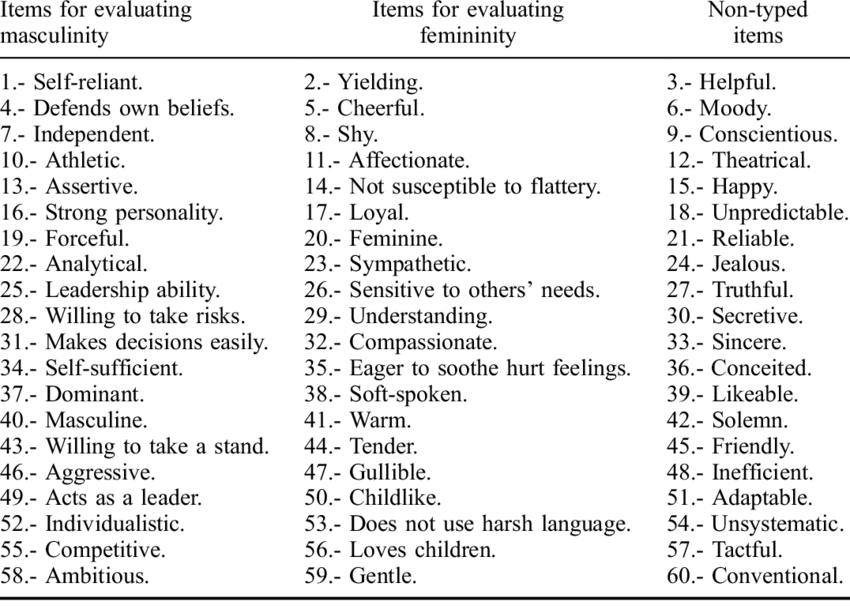

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [5]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

Now we have prepared all the dependencies needed.

In [5]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [10]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [11]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'

# Initialize Riveter
riveter = Riveter()

# Load the 'power' lexicon
riveter.load_sap_lexicon('power')

# Create an empty dictionary to store scores
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [12]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:

    riveter.train(segments,
                  text_ids,
                  num_bootstraps=20,
                  persona_patterns_dict={'masculine': r'^he$|^him$|^himself$',})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|          | 1/90 [00:20<29:49, 20.11s/it]

2024-03-14 23:34:21 Complete!
Story ID: 4706144, Masculine Power Score: 0.08961291489378252



Processing stories:   2%|▏         | 2/90 [00:38<28:17, 19.29s/it]

2024-03-14 23:34:40 Complete!
Story ID: 4752980, Masculine Power Score: 0.26743604967749784



Processing stories:   3%|▎         | 3/90 [00:57<27:23, 18.89s/it]

2024-03-14 23:34:59 Complete!
Story ID: 4621698, Masculine Power Score: 0.6374603174603176



Processing stories:   4%|▍         | 4/90 [01:22<30:47, 21.48s/it]

2024-03-14 23:35:24 Complete!
Story ID: 3651108, Masculine Power Score: 0.1325262313865255



Processing stories:   6%|▌         | 5/90 [01:50<33:25, 23.60s/it]

2024-03-14 23:35:51 Complete!
Story ID: 5282729, Masculine Power Score: 0.20317740936534764



Processing stories:   7%|▋         | 6/90 [02:10<31:29, 22.49s/it]

2024-03-14 23:36:12 Complete!
Story ID: 5533886, Masculine Power Score: 3.637566137566113e-05



Processing stories:   8%|▊         | 7/90 [02:30<30:14, 21.87s/it]

2024-03-14 23:36:32 Complete!
Story ID: 4547622, Masculine Power Score: 0.05192466995978319



Processing stories:   9%|▉         | 8/90 [02:46<27:14, 19.93s/it]

2024-03-14 23:36:48 Complete!
Story ID: 16177508, Masculine Power Score: 0.15977192262753132



Processing stories:  10%|█         | 9/90 [03:21<33:17, 24.66s/it]

2024-03-14 23:37:23 Complete!
Story ID: 15745185, Masculine Power Score: -0.11028275587219227



Processing stories:  11%|█         | 10/90 [03:41<31:00, 23.26s/it]

2024-03-14 23:37:43 Complete!
Story ID: 15654528, Masculine Power Score: 0.179951312609031



Processing stories:  12%|█▏        | 11/90 [04:02<29:35, 22.48s/it]

2024-03-14 23:38:04 Complete!
Story ID: 7448155, Masculine Power Score: 0.3234990786524799



Processing stories:  13%|█▎        | 12/90 [04:20<27:22, 21.05s/it]

2024-03-14 23:38:22 Complete!
Story ID: 4983847, Masculine Power Score: 0.1075309298311203



Processing stories:  14%|█▍        | 13/90 [04:37<25:21, 19.76s/it]

2024-03-14 23:38:39 Complete!
Story ID: 3313118, Masculine Power Score: -0.22174442405420666



Processing stories:  16%|█▌        | 14/90 [04:52<23:28, 18.53s/it]

2024-03-14 23:38:54 Complete!
Story ID: 3290390, Masculine Power Score: -0.10554543548894246



Processing stories:  17%|█▋        | 15/90 [05:11<23:05, 18.47s/it]

2024-03-14 23:39:13 Complete!
Story ID: 36435301, Masculine Power Score: 0.07761637738417923



Processing stories:  18%|█▊        | 16/90 [05:28<22:16, 18.06s/it]

2024-03-14 23:39:30 Complete!
Story ID: 36575491, Masculine Power Score: 0.26334021642666344



Processing stories:  19%|█▉        | 17/90 [05:49<23:02, 18.94s/it]

2024-03-14 23:39:51 Complete!
Story ID: 35225224, Masculine Power Score: 0.24682079767597664



Processing stories:  20%|██        | 18/90 [06:04<21:31, 17.94s/it]

2024-03-14 23:40:06 Complete!
Story ID: 4594527, Masculine Power Score: 0.12454156954156952



Processing stories:  21%|██        | 19/90 [06:17<19:23, 16.38s/it]

2024-03-14 23:40:19 Complete!
Story ID: 5485625, Masculine Power Score: 0.10376657824933685



Processing stories:  22%|██▏       | 20/90 [06:32<18:28, 15.84s/it]

2024-03-14 23:40:34 Complete!
Story ID: 36408319, Masculine Power Score: 0.14228600914049833



Processing stories:  23%|██▎       | 21/90 [06:48<18:28, 16.06s/it]

2024-03-14 23:40:50 Complete!
Story ID: 35762659, Masculine Power Score: 0.19861260561250282



Processing stories:  24%|██▍       | 22/90 [07:09<19:40, 17.36s/it]

2024-03-14 23:41:11 Complete!
Story ID: 35603194, Masculine Power Score: 0.37481058969262243



Processing stories:  26%|██▌       | 23/90 [07:25<19:05, 17.09s/it]

2024-03-14 23:41:27 Complete!
Story ID: 35344306, Masculine Power Score: 0.13696299209543628



Processing stories:  27%|██▋       | 24/90 [07:37<17:04, 15.53s/it]

2024-03-14 23:41:39 Complete!
Story ID: 36695155, Masculine Power Score: 0.12333333333333336



Processing stories:  28%|██▊       | 25/90 [07:57<18:14, 16.83s/it]

2024-03-14 23:41:59 Complete!
Story ID: 36064474, Masculine Power Score: 0.09442139960747356



Processing stories:  29%|██▉       | 26/90 [08:13<17:50, 16.73s/it]

2024-03-14 23:42:15 Complete!
Story ID: 36024820, Masculine Power Score: 0.14634890481812074



Processing stories:  30%|███       | 27/90 [08:44<22:04, 21.02s/it]

2024-03-14 23:42:46 Complete!
Story ID: 35182330, Masculine Power Score: 0.056814289234661274



Processing stories:  31%|███       | 28/90 [09:02<20:38, 19.97s/it]

2024-03-14 23:43:04 Complete!
Story ID: 36567496, Masculine Power Score: 0.2116405038939375



Processing stories:  32%|███▏      | 29/90 [09:18<19:01, 18.71s/it]

2024-03-14 23:43:20 Complete!
Story ID: 35560330, Masculine Power Score: 0.10590230843567608



Processing stories:  33%|███▎      | 30/90 [09:35<18:22, 18.38s/it]

2024-03-14 23:43:37 Complete!
Story ID: 35877496, Masculine Power Score: 0.13110516200347805



Processing stories:  34%|███▍      | 31/90 [10:12<23:18, 23.71s/it]

2024-03-14 23:44:13 Complete!
Story ID: 35957410, Masculine Power Score: 0.28636474545257584



Processing stories:  36%|███▌      | 32/90 [10:36<23:13, 24.02s/it]

2024-03-14 23:44:38 Complete!
Story ID: 30947654, Masculine Power Score: 0.03731697778930084



Processing stories:  37%|███▋      | 33/90 [11:03<23:43, 24.97s/it]

2024-03-14 23:45:05 Complete!
Story ID: 36332707, Masculine Power Score: -0.09621422576909969



Processing stories:  38%|███▊      | 34/90 [11:30<23:44, 25.44s/it]

2024-03-14 23:45:32 Complete!
Story ID: 35967940, Masculine Power Score: 0.17190582968347157



Processing stories:  39%|███▉      | 35/90 [11:59<24:14, 26.44s/it]

2024-03-14 23:46:01 Complete!
Story ID: 35001073, Masculine Power Score: 0.10868603618603619



Processing stories:  40%|████      | 36/90 [12:28<24:28, 27.19s/it]

2024-03-14 23:46:30 Complete!
Story ID: 35138911, Masculine Power Score: 0.14258654233463802



Processing stories:  41%|████      | 37/90 [12:45<21:30, 24.35s/it]

2024-03-14 23:46:47 Complete!
Story ID: 35280397, Masculine Power Score: 0.22980940988835724



Processing stories:  42%|████▏     | 38/90 [13:03<19:16, 22.24s/it]

2024-03-14 23:47:05 Complete!
Story ID: 36049939, Masculine Power Score: 0.28099237830622537



Processing stories:  43%|████▎     | 39/90 [13:20<17:40, 20.80s/it]

2024-03-14 23:47:22 Complete!
Story ID: 34995673, Masculine Power Score: 0.14580605719584663



Processing stories:  44%|████▍     | 40/90 [13:37<16:23, 19.68s/it]

2024-03-14 23:47:39 Complete!
Story ID: 33477346, Masculine Power Score: 0.4378283113944878



Processing stories:  46%|████▌     | 41/90 [13:56<15:44, 19.28s/it]

2024-03-14 23:47:57 Complete!
Story ID: 36840832, Masculine Power Score: -0.22757350836298204



Processing stories:  47%|████▋     | 42/90 [14:10<14:12, 17.77s/it]

2024-03-14 23:48:12 Complete!
Story ID: 30896276, Masculine Power Score: 0.14097744360902253



Processing stories:  48%|████▊     | 43/90 [14:25<13:12, 16.87s/it]

2024-03-14 23:48:26 Complete!
Story ID: 37363471, Masculine Power Score: 0.42450216450216444



Processing stories:  49%|████▉     | 44/90 [14:38<12:07, 15.82s/it]

2024-03-14 23:48:40 Complete!
Story ID: 36984901, Masculine Power Score: 0.11091639254720344



Processing stories:  50%|█████     | 45/90 [14:53<11:46, 15.70s/it]

2024-03-14 23:48:55 Complete!
Story ID: 33353644, Masculine Power Score: -0.03011875795310867



Processing stories:  51%|█████     | 46/90 [15:10<11:42, 15.96s/it]

2024-03-14 23:49:12 Complete!
Story ID: 37002835, Masculine Power Score: -0.14759719812351388



Processing stories:  52%|█████▏    | 47/90 [15:26<11:32, 16.09s/it]

2024-03-14 23:49:28 Complete!
Story ID: 5630824, Masculine Power Score: 0.31394275161588175



Processing stories:  53%|█████▎    | 48/90 [15:43<11:18, 16.16s/it]

2024-03-14 23:49:45 Complete!
Story ID: 10053617, Masculine Power Score: 0.2082456740042236



Processing stories:  54%|█████▍    | 49/90 [16:02<11:44, 17.19s/it]

2024-03-14 23:50:04 Complete!
Story ID: 1572659, Masculine Power Score: 0.24749348690525164



Processing stories:  56%|█████▌    | 50/90 [16:21<11:46, 17.67s/it]

2024-03-14 23:50:23 Complete!
Story ID: 7450573, Masculine Power Score: 0.36553260980505564



Processing stories:  57%|█████▋    | 51/90 [16:37<11:04, 17.03s/it]

2024-03-14 23:50:38 Complete!
Story ID: 6918676, Masculine Power Score: 0.06711108332999752



Processing stories:  58%|█████▊    | 52/90 [16:54<10:54, 17.24s/it]

2024-03-14 23:50:56 Complete!
Story ID: 6075402, Masculine Power Score: 0.36759979564380846



Processing stories:  59%|█████▉    | 53/90 [17:10<10:24, 16.87s/it]

2024-03-14 23:51:12 Complete!
Story ID: 11101779, Masculine Power Score: 0.3489835164835165



Processing stories:  60%|██████    | 54/90 [17:28<10:14, 17.08s/it]

2024-03-14 23:51:30 Complete!
Story ID: 11321331, Masculine Power Score: 0.0638524073667161



Processing stories:  61%|██████    | 55/90 [17:48<10:28, 17.95s/it]

2024-03-14 23:51:50 Complete!
Story ID: 12284853, Masculine Power Score: 0.02843084167892352



Processing stories:  62%|██████▏   | 56/90 [18:04<09:47, 17.27s/it]

2024-03-14 23:52:05 Complete!
Story ID: 12282003, Masculine Power Score: 0.10131849886639009



Processing stories:  63%|██████▎   | 57/90 [18:17<08:47, 15.98s/it]

2024-03-14 23:52:18 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|██████▍   | 58/90 [18:31<08:16, 15.52s/it]

2024-03-14 23:52:33 Complete!
Story ID: 4228053, Masculine Power Score: 0.2140837246881786



Processing stories:  66%|██████▌   | 59/90 [18:48<08:12, 15.89s/it]

2024-03-14 23:52:50 Complete!
Story ID: 12127317, Masculine Power Score: 0.13450537787395675



Processing stories:  67%|██████▋   | 60/90 [19:02<07:39, 15.33s/it]

2024-03-14 23:53:04 Complete!
Story ID: 12010134, Masculine Power Score: 0.271885178158685



Processing stories:  68%|██████▊   | 61/90 [19:18<07:33, 15.64s/it]

2024-03-14 23:53:20 Complete!
Story ID: 11510919, Masculine Power Score: 0.46525917489414936



Processing stories:  69%|██████▉   | 62/90 [19:33<07:15, 15.55s/it]

2024-03-14 23:53:35 Complete!
Story ID: 8145802, Masculine Power Score: 0.2402398805906004



Processing stories:  70%|███████   | 63/90 [19:52<07:26, 16.52s/it]

2024-03-14 23:53:54 Complete!
Story ID: 6637942, Masculine Power Score: -0.16424149808664884



Processing stories:  71%|███████   | 64/90 [20:08<07:06, 16.38s/it]

2024-03-14 23:54:10 Complete!
Story ID: 7427905, Masculine Power Score: -0.023690307955013833



Processing stories:  72%|███████▏  | 65/90 [20:24<06:45, 16.23s/it]

2024-03-14 23:54:26 Complete!
Story ID: 3893857, Masculine Power Score: 0.13156532881083005



Processing stories:  73%|███████▎  | 66/90 [20:40<06:27, 16.13s/it]

2024-03-14 23:54:42 Complete!
Story ID: 33040258, Masculine Power Score: 0.19866332497911446



Processing stories:  74%|███████▍  | 67/90 [20:57<06:14, 16.27s/it]

2024-03-14 23:54:59 Complete!
Story ID: 33858850, Masculine Power Score: -0.16355111131875025



Processing stories:  76%|███████▌  | 68/90 [21:15<06:13, 16.96s/it]

2024-03-14 23:55:17 Complete!
Story ID: 2775776, Masculine Power Score: 0.25708874458874453



Processing stories:  77%|███████▋  | 69/90 [21:31<05:50, 16.68s/it]

2024-03-14 23:55:33 Complete!
Story ID: 3197963, Masculine Power Score: 0.26564102564102565



Processing stories:  78%|███████▊  | 70/90 [21:50<05:43, 17.18s/it]

2024-03-14 23:55:51 Complete!
Story ID: 12395199, Masculine Power Score: 0.15981874880829586



Processing stories:  79%|███████▉  | 71/90 [22:05<05:15, 16.60s/it]

2024-03-14 23:56:07 Complete!
Story ID: 10934010, Masculine Power Score: 0.2674440374440374



Processing stories:  80%|████████  | 72/90 [22:19<04:47, 15.99s/it]

2024-03-14 23:56:21 Complete!
Story ID: 12301116, Masculine Power Score: -0.017750225316987046



Processing stories:  81%|████████  | 73/90 [22:36<04:34, 16.17s/it]

2024-03-14 23:56:38 Complete!
Story ID: 12706317, Masculine Power Score: -0.12139579083258956



Processing stories:  82%|████████▏ | 74/90 [22:55<04:31, 16.99s/it]

2024-03-14 23:56:57 Complete!
Story ID: 11499468, Masculine Power Score: -0.06324411610519581



Processing stories:  83%|████████▎ | 75/90 [23:11<04:09, 16.66s/it]

2024-03-14 23:57:13 Complete!
Story ID: 12184146, Masculine Power Score: 0.3051689573395855



Processing stories:  84%|████████▍ | 76/90 [23:27<03:49, 16.39s/it]

2024-03-14 23:57:28 Complete!
Story ID: 12201333, Masculine Power Score: 0.10392962927876721



Processing stories:  86%|████████▌ | 77/90 [23:43<03:33, 16.41s/it]

2024-03-14 23:57:45 Complete!
Story ID: 11496030, Masculine Power Score: 0.004055675962322503



Processing stories:  87%|████████▋ | 78/90 [24:02<03:27, 17.32s/it]

2024-03-14 23:58:04 Complete!
Story ID: 11510277, Masculine Power Score: 0.2089005103876469



Processing stories:  88%|████████▊ | 79/90 [24:21<03:14, 17.65s/it]

2024-03-14 23:58:23 Complete!
Story ID: 10772274, Masculine Power Score: 0.46268126045290103



Processing stories:  89%|████████▉ | 80/90 [24:36<02:49, 16.91s/it]

2024-03-14 23:58:38 Complete!
Story ID: 12646050, Masculine Power Score: 0.03852717522415665



Processing stories:  90%|█████████ | 81/90 [24:54<02:35, 17.25s/it]

2024-03-14 23:58:56 Complete!
Story ID: 11161479, Masculine Power Score: -0.03479667482358086



Processing stories:  91%|█████████ | 82/90 [25:09<02:12, 16.61s/it]

2024-03-14 23:59:11 Complete!
Story ID: 12069936, Masculine Power Score: 0.052725346183992806



Processing stories:  92%|█████████▏| 83/90 [25:25<01:55, 16.47s/it]

2024-03-14 23:59:27 Complete!
Story ID: 12285972, Masculine Power Score: 0.4389805287532142



Processing stories:  93%|█████████▎| 84/90 [25:40<01:35, 15.91s/it]

2024-03-14 23:59:42 Complete!
Story ID: 12372702, Masculine Power Score: -0.029265539735864477



Processing stories:  94%|█████████▍| 85/90 [26:01<01:27, 17.43s/it]

2024-03-15 00:00:03 Complete!
Story ID: 12610496, Masculine Power Score: 0.09948649993359188



Processing stories:  96%|█████████▌| 86/90 [26:25<01:17, 19.27s/it]

2024-03-15 00:00:26 Complete!
Story ID: 10970472, Masculine Power Score: 0.07300535113035113



Processing stories:  97%|█████████▋| 87/90 [26:53<01:06, 22.16s/it]

2024-03-15 00:00:55 Complete!
Story ID: 12084552, Masculine Power Score: 0.3254106611928249



Processing stories:  98%|█████████▊| 88/90 [27:17<00:44, 22.46s/it]

2024-03-15 00:01:18 Complete!
Story ID: 12727119, Masculine Power Score: 0.01789504701450822



Processing stories:  99%|█████████▉| 89/90 [27:32<00:20, 20.33s/it]

2024-03-15 00:01:34 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [27:55<00:00, 18.61s/it]

2024-03-15 00:01:56 Complete!
Story ID: 10859508, Masculine Power Score: 0.22827405897943215


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [13]:
#df.to_csv('2updated_df_with_scores.csv', index=False)

#print("DataFrame saved with masculine power scores.")
#riveter.save('2m_riveter_model.pkl') #saving the model


DataFrame saved with masculine power scores.
Riveter successfully saved to "m_riveter_model.pkl"


In [14]:
# Q2 (code)
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.089613
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.267436
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.637460
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.132526
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.203177


In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.


##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [15]:
!pip install lexicalrichness

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [16]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.089613,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.267436,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.637460,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.132526,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.203177,0.376110


# Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


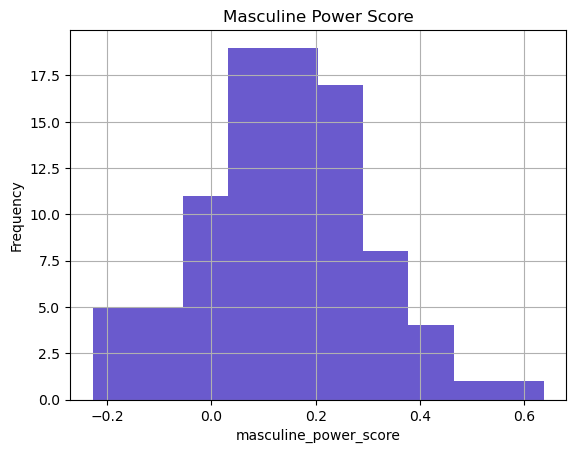

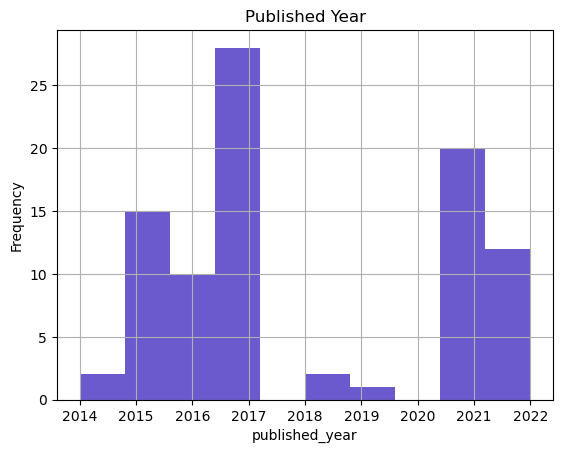

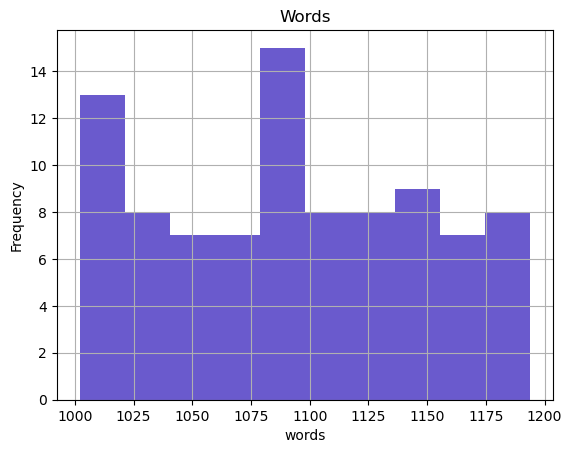

In [23]:
# Q3a (code): Check data distribution

# Check data distribution

#Create plots
#Plot for Masculine Power Score
plt.figure()
df['masculine_power_score'].hist(color='slateblue')
plt.title('Masculine Power Score')
plt.xlabel('masculine_power_score')
plt.ylabel('Frequency')
plt.show()

#Plot for Published Year
plt.figure()
df['published_year'].hist(color='slateblue')
plt.title('Published Year')
plt.xlabel('published_year')
plt.ylabel('Frequency')
plt.show()

#Plot for Words
plt.figure()
df['words'].hist(color='slateblue') 
plt.title('Words')
plt.xlabel('words')
plt.ylabel('Frequency')
plt.show()

In [32]:
# In addition to the plots, let's perform Shapiro-Wilk tests

import pandas as pd
from scipy import stats

variables_to_test = ['masculine_power_score', 'published_year', 'words']
alpha = 0.05

for var in variables_to_test:
    stat, p_val = stats.shapiro(df[var])
    print(f"Shapiro-Wilk test for {var}: p-value = {p_val}")
    # Interpretation based on the p-value
    if p_val > alpha:
        print(f"{var} looks normally distributed (Gaussian) (fail to reject H0)\n")
    else:
        print(f"{var} does not look normally distributed (Gaussian) (reject H0)\n")


Shapiro-Wilk test for masculine_power_score: p-value = 0.8237505555152893
masculine_power_score looks normally distributed (Gaussian) (fail to reject H0)

Shapiro-Wilk test for published_year: p-value = 3.464673881126146e-08
published_year does not look normally distributed (Gaussian) (reject H0)

Shapiro-Wilk test for words: p-value = 0.0025207288563251495
words does not look normally distributed (Gaussian) (reject H0)



<div class="alert-info">

The histogram for **masculine_power_score** shows a distribution that seems relatively symmetrical, and Shapiro-Wilk test indicated p > 0.05. This could indicate a normal distribution (we fail to reject the $H_0$ of normality).

The histograms for **published_year** and **words** show a distribution that is not symmetrical, and Shapiro-Wilk test indicated p < 0.05 for both variables. This suggests a deviation from normality (the $H_0$ of normality should be rejected for these variables).

</div>

In [25]:
# Q3b (code): compute some descriptive statistics
df.describe()

,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,89.000000,65.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,135.393258,6.923077,0.141441,0.405027
std,1.307922e+07,2.612177,55.327048,229.972311,7.005149,0.164434,0.037109
min,1.572659e+06,2014.000000,1002.000000,1.000000,1.000000,-0.227574,0.264443
25%,7.448760e+06,2016.000000,1042.250000,20.000000,2.000000,0.041877,0.384458
50%,1.224167e+07,2017.000000,1095.000000,54.000000,5.000000,0.133516,0.410169
75%,3.517148e+07,2021.000000,1141.750000,122.000000,9.000000,0.247325,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.637460,0.491349


In [36]:
# Q3c (code): Check for any missing values
 
missing_values = df.isnull().sum() 

if missing_values.any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")
    
# Show the places where the values are missing
missing_values

There are missing values in the dataset.


story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64

In [37]:
# Q3d (code): replace all the NA values with zeros and check again Q3c

# Replace NA values with zeros
df.fillna(0, inplace=True)

# Check for any missing values again
missing_values_after_replacement = df.isnull().sum()

# Show the places where the values are missing (after replacement)
print(missing_values_after_replacement)

# Confirming that there are no more missing values
if missing_values_after_replacement.any():
    print("There are still missing values in the dataset.")
else:
    print("All missing values have been replaced with zeros.")


story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64
All missing values have been replaced with zeros.


In [39]:
# Checking Q3c once again
missing_values = df.isnull().sum() 

if missing_values.any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

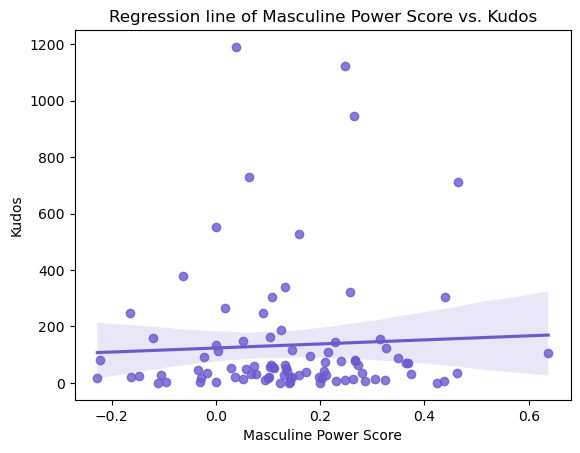

In [44]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos

# Assigning variables for the scatter plot
masculine_power_score = df['masculine_power_score']
kudos = df['kudos']


# Creating a scatter plot with a correlation line using seaborn

sns.regplot(x="masculine_power_score", y="kudos", data=df, color="slateblue")
plt.xlabel("Masculine Power Score") 
plt.ylabel("Kudos")
plt.title("Regression line of Masculine Power Score vs. Kudos")
plt.show()

<div class="alert-info">

The plot suggests that there is no strong linear relationship between **masculine_power_score** and **kudos**, judging by the flat slope of the regression line. While there might be a slight positive trend as indicated by the regression line, the overall relationship between the variables appears to be weak.
    
</div>


**Q5. Multiple Regression and Analysis**

In [51]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
import statsmodels.api as sm

# Assume 'df' is your DataFrame and you have already defined it and replaced missing values with zeros

# Define the dependent variable
y = df['kudos']

# Define the independent variables
X = df[['masculine_power_score', 'published_year', 'lexical_richness']] 

# Add a constant to the model (the intercept term)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     5.513
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00164
Time:                        02:05:23   Log-Likelihood:                -608.37
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.015e+

**Q6. Interpret the results of the regression analysis**

In [ ]:
# Q6a (words): Interpret the R-squared and Adj. R-squared

<div class="alert-info">
 With an R-squared of 0.161, the model doesn't really explain a lot—only about 16.1% of the variability in kudos can be linked to the factors we looked at. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model. 
    
When we adjust for how many factors we're considering we get the adjusted R-squared of 0.132. The adjusted R-squared value of 0.132 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

</div>

In [ ]:
# Q6b (words): Interpret F-test result

<div class="alert-info">
We got a large F-statistic of 5.513 with a very small p-value (0.00164). The F-test is used to determine if there is a significant relationship between the dependent variable and the set of independent variables. A significant F-test (p-value < 0.05) indicates that the overall model is statistically significant compared to a model without any predictors. Since the p-value is < 0.05, it suggests that this model is statistically significant at a common  $\alpha$ level of 0.05. This still can indicate that the variables have an influence, but we can not tell which ones are important just from this test alone.
</div>

In [49]:
# Q6c (words): Interpret coefficients and t-test result

<div class="alert-info">
    
The coefficient for **masculine_power_score** is 34.9197, but the t-test p-value for this coefficient is  0.253, which is not statistically significant (p > 0.05). This means that masculine_power_score does not have a significant effect on kudos at the 95% confidence level ($\alpha$ = 0.05).
    
The **published_year** has a coefficient of -34.7766, with a p-value of 0.000, which is significant (p < 0.05). This indicates a significant negative relationship between published_year and kudos, meaning that more recent stories tend to have fewer kudos, all else being equal.
                                                                                                               
The coefficient for **lexical_richness** is 396.8154, with a p-value of 0.518. This is not statistically significant (p > 0.05), suggesting that the number of words does not have a significant impact on kudos at the 95% confidence level ($\alpha$ = 0.05).
    
</div>

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [54]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test

# Define X (independent variables) and y (dependent variable)
X = df[['masculine_power_score', 'published_year', 'words']]
y = df['kudos']

# Add a constant to the model (it's a requirement for OLS in statsmodels)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Predicting the values of kudos based on the model
y_pred = model.predict(X)

# Calculating the residuals
residuals = y - y_pred

# Perform the Shapiro-Wilk test on the residuals
_, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk test p-value: {p_value}')


Shapiro-Wilk test p-value: 2.1097164813743685e-12


In [ ]:
# Q7b (words): Write your analysis for the Normality Test there:

<div class="alert-info">
    
The Shapiro-Wilk test result has given a p-value that's extremely small, close to 0 (2.1097164813743685e-12).This is the evidence of the fact that the residuals are not normally distributed. It suggests that the normality assumption required for OLS regression might be violated in the model, which could affect the validity of some statistical inferences made from the regression results, like hypothesis testing and confidence intervals.                                                                                                     
</div>

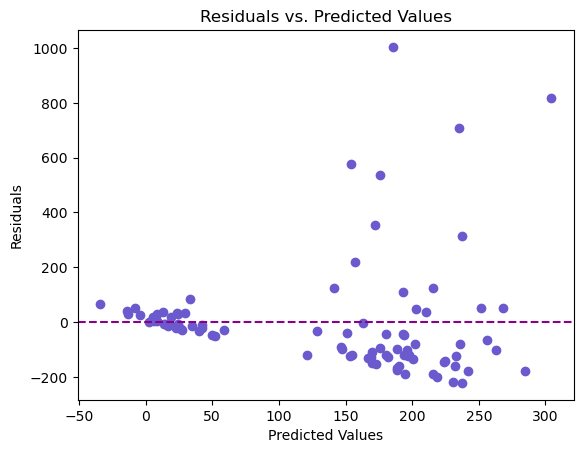

In [57]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)

plt.scatter(y_pred, residuals, c='slateblue')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='darkmagenta', linestyle='--')
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [ ]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:


<div class="alert-info">
The plot shows that the residuals are not evenly scattered across the range of predicted values. There's a noticeable pattern where the variability of the residuals increases with the predicted kudos, which is indicated by the spread of points that appears to get wider as we move to the right. This suggests that the assumption of homoscedasticity might be violated, as the data might demonstrate heteroscedasticity. This pattern could be a sign that the model's predictions are less reliable at higher values of kudos.                                                                                             
</div>

**Q8: Multicollinearity**

In [59]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature            VIF
0                  const  606165.366432
1  masculine_power_score       1.003552
2         published_year       1.003516
3                  words       1.000035


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:

<div class="alert-info">

There appears to be no significant multicollinearity among the independent variables (the VIF values for all variables are close to 1). This means that each one provides unique information, and our predictors are probably reliable, which is good for the model. A very high VIF constant score is should not be a concern as it does not indicate multicollinearity among the predictors, and, as stated above, may have to do with numerical issues.

</div>

**Q9: Reflection**

In [ ]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?


<div class="alert-info">

**Relevance**
    
This research is an example of fascinating intersection of cultural studies and data analytics that operationalizes a complex concept like "soft masculinity" into measurable data. This approach can reveal new insights into how cultural phenomena like the Korean Wave is exhibited in fan-created narratives. The choice to focus on BTS fanfiction from AO3 is particularly suitable, establishing the research in a contemporary context and fitting into social and cultural landscape.

**Areas for improvement**
    
Despite the methodological correctness, there were several issues with the results obtained from the statistical tests and visualizations. For instance, the significant Shapiro-Wilk test result indicates that the residuals are not normally distributed. Reflecting on this, it might be useful to consider the ways of getting residuals that would better fit the normality assumption (e.g. transforming the data or using a different type of non-parametric data analysis).
    
Furthermore, the plot of residuals VS. predicted values showed the potential presence of heteroscedasticity, suggesting that the model's predictions are less consistent at different levels of kudos. Reflecting on this could involve exploring modeling solutions that are resistant to heteroscedasticity.
    
Moreover, the low R-squared value calls for considering including additional variables that might better capture the success scores of fanfiction. Lastly, while VIF scores indicated no significant multicollinearity, but the large condition number from the regression suggests otherwise. 

Overall, I enjoyed conducting this research, however, there are several inconsistencies that should be adressed to increase the validity of the results. 
</div>

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.